# Color detection

In [1]:
# Imports
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

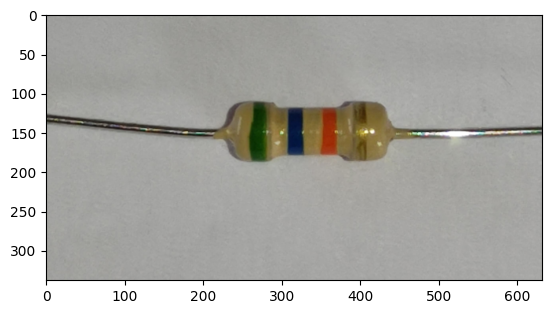

In [2]:
# Load images
image = cv2.imread('../../data/resistor.png')

# Converting RGB image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Detect resistor using HAAR Cascades

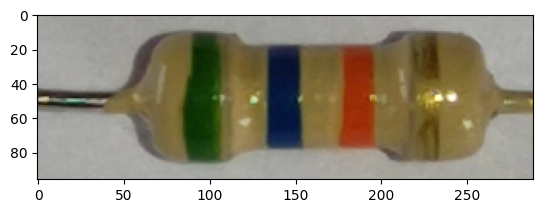

In [3]:
# Load resistor haar cascade classifier
rectcascade = cv2.CascadeClassifier("../../data/haar_cascade_files/haarcascade_resistors_0.xml")

# Detect resistor
resistors = rectcascade.detectMultiScale(gray)

# Create the bounding box around the detected resistor
for (x, y, w, h) in resistors:
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]
            
# Show image 
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
plt.show()

## Cluster all colors 

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


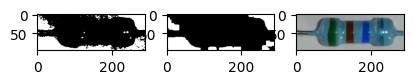

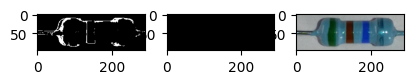

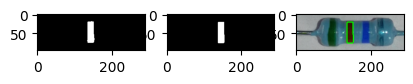

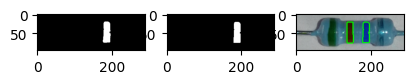

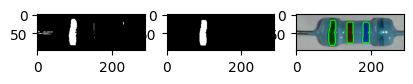

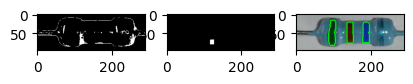

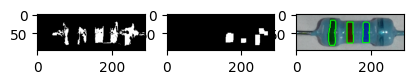

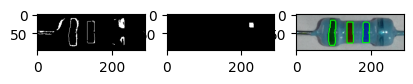

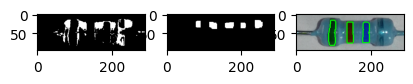

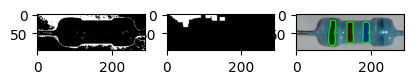

In [4]:
# Prepare data
data = roi_color.reshape(np.shape(roi_color)[0]*np.shape(roi_color)[1], np.shape(roi_color)[2])
data = np.float32(data)

# Cluster data
clt = KMeans(n_clusters = 10)
clt.fit(data)

# Loop over all pixel clusters
band_data = {}
labels = np.unique(clt.labels_)
for i in labels:

    # Get image
    new_image = np.uint8(clt.labels_.reshape(np.shape(roi_color)[0], np.shape(roi_color)[1])==i)

    # Morphological transformation
    new_image_open = cv2.morphologyEx(new_image, cv2.MORPH_OPEN, np.ones((10,10),np.uint8))

    # Find contours
    contours, hierarchy = cv2.findContours(new_image_open, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    # Loop over contours
    for cnt in contours:

        # Find area of contour
        area = cv2.contourArea(cnt)

        # Find aspect ratio of contour
        x,y,w,h = cv2.boundingRect(cnt)
        aspect_ratio = float(w)/h

        # Find center of contour
        M = cv2.moments(cnt)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # Filter contours based on aspect ratio and area
        if aspect_ratio < 0.5 and area > 500:

            # Add band to band data
            band_data[cX] = roi_color[new_image == 1]

            # Draw contours on original image
            cv2.drawContours(roi_color, cnt, -1, (0, 255, 0), 2)

    # Plot images
    plt.subplot(1, 4, 1)
    plt.imshow(new_image, cmap='gray')
    plt.subplot(1, 4, 2)
    plt.imshow(new_image_open, cmap='gray')
    plt.subplot(1, 4, 3)
    plt.imshow(roi_color)
    plt.show()

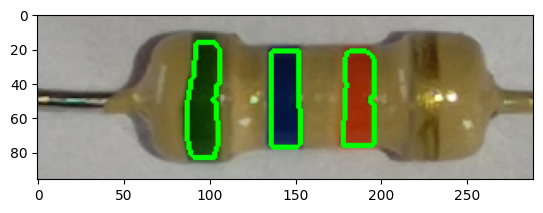

In [5]:
# Show image
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
plt.show()